NameError: name 'se' is not defined

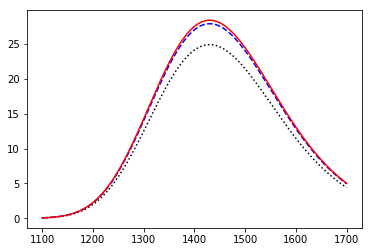

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as  np
K_e = 0.118
x = np.linspace(1100, 1700, 601)
lambda_c = 1410
sigma_e = (x**2)*np.exp(-((x-lambda_c)/(K_e*x))**2)
nor = sigma_e/np.max(sigma_e)
se_1 = nor *24.9
se_2 = nor *27.9
se_3 = nor *28.4
plt.plot(x, se_1, 'k:', label = '2.5 W')
plt.plot(x, se_2, 'b--', label = '5 W')
plt.plot(x, se_3, 'r', label = '10 W')

df = pd.DataFrame({'s_e' : se, 'w' : x})

loss = []
def tuning_range(bandwidth):
    window = 10**-2.5
    for i in range(601 - bandwidth):
        if abs(df['s_e'][i] - df['s_e'][i+bandwidth]) <= window:
            print(df['w'][i], df['w'][i+bandwidth])
            loss.append(df['s_e'][i])

plt.xlim(1200, 1700)
    
ax = plt.gca()
sp = ['right', 'left', 'top', 'bottom']
for i in sp:
    ax.spines[i].set_color('black')
    ax.spines[i].set_linewidth(2)
ax.tick_params(axis = "y", direction = "in")
ax.tick_params(axis = "x", direction = "in")
plt.xlabel('Wavelength (nm)', fontsize = 14)
plt.ylabel('Gain (dB)', fontsize = 14)
plt.legend(loc = 'best')
plt.show()

In [7]:
os.chdir(r'D:\desktop')
f = pd.DataFrame(se_3)
f.to_csv('test.csv')